In [4]:
import numpy as np
import plotly.express as ex
import pandas as pd

Covariace estimated by the Kalman Filter will be lower than either the initial covariance estimate, measurement noise or process noise.

## No process noise

Let's start with initial estimate and measurement noise being equal, no process noise. Repeated Kalman Filter updates are equivalent to an average of N normally-distributed random variables. According to the Central Limit Theorem, variance converges to $\sigma / \sqrt{n}$.

In [17]:
def simulate_variance(P: float, R: float, Q: float):
    trace = [P]

    for _ in range(100):
        K = P / (P + R)
        P = K**2 * R + (1-K)**2 * P + Q
        trace.append(P)
    
    return trace

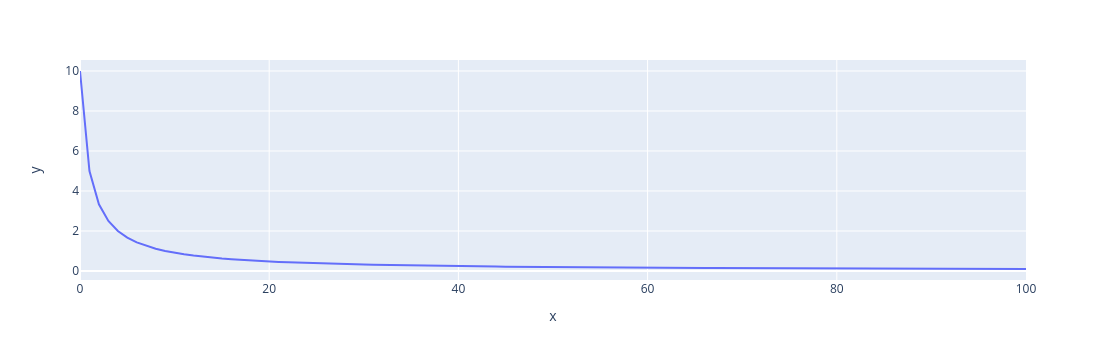

In [18]:
ex.line(y=simulate_variance(10, 10, 0))

## With process noise

If we introduce process noise, variance converges to a value lower than measurement noise but higher than process noise.

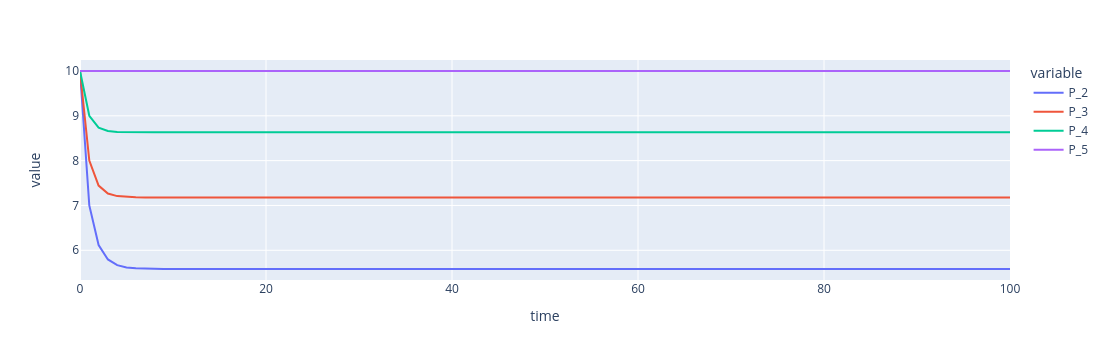

In [20]:
data = pd.DataFrame(dict(P_2=simulate_variance(10, 10, 2),
                         P_3=simulate_variance(10, 10, 3),
                         P_4=simulate_variance(10, 10, 4),
                         P_5=simulate_variance(10, 10, 5),
                         time=range(101)))
data = data.melt(id_vars=['time'])
ex.line(data, x='time', y='value', color='variable')

The limiting variance can be calculate from the following:

$$
K = \frac{P}{P+R}
$$
$$
P = K^2 R + (1-K)^2 P + Q
$$

which can be refomulated as:

$$
P^2 R + R^2 P = (P-Q)(P+R)^2
$$

which for $P=R=10$ and $Q=2$ result in $P=1+\sqrt{21}\approx5.58$ while for $Q=5$ results in $P=10$.